In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
print("Missing values before processing:")
print(df.isnull().sum())
df = df.dropna()

Missing values before processing:
id          0
age         0
target      0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [92]:
potential_targets = [col for col in df.columns if df[col].nunique() == 2]
if potential_targets:
    target_col = potential_targets[0]
    df.rename(columns={target_col: 'target'}, inplace=True)
    print(f"Target column identified and renamed to 'target': {target_col}")
else:
    raise KeyError("Could not identify the target column.")

if df['target'].dtype == 'object':
    df['target'] = df['target'].map({'Male': 0, 'Female': 1})

df['target'] = df['target'].astype(int)

numeric_df = df.select_dtypes(include=[np.number])


Target column identified and renamed to 'target': target


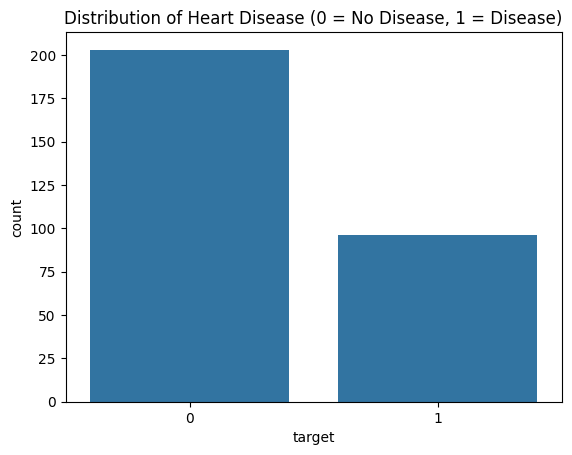

In [93]:
sns.countplot(x=df['target'])
plt.title("Distribution of Heart Disease (0 = No Disease, 1 = Disease)")
plt.show()


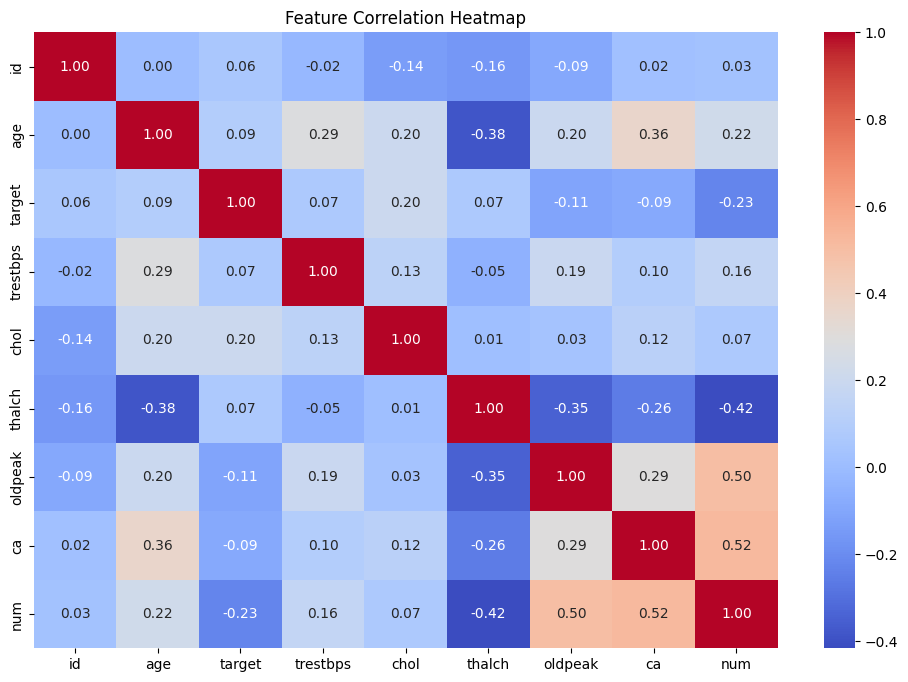

In [94]:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [95]:
X = df.drop(columns=['target'])
y = df['target']
X = X.select_dtypes(include=[np.number])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [96]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [97]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [98]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.62
Precision: 0.25
Recall: 0.11
F1 Score: 0.15


In [99]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75        41
           1       0.25      0.11      0.15        19

    accuracy                           0.62        60
   macro avg       0.46      0.48      0.45        60
weighted avg       0.54      0.62      0.56        60



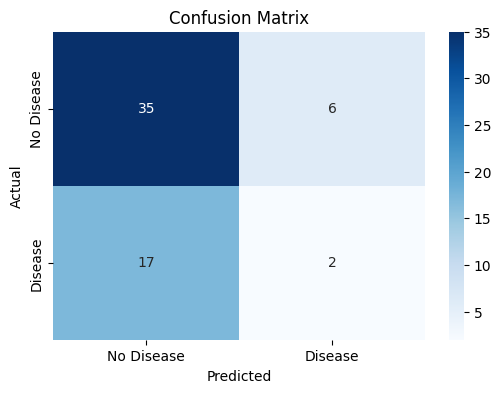

In [100]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

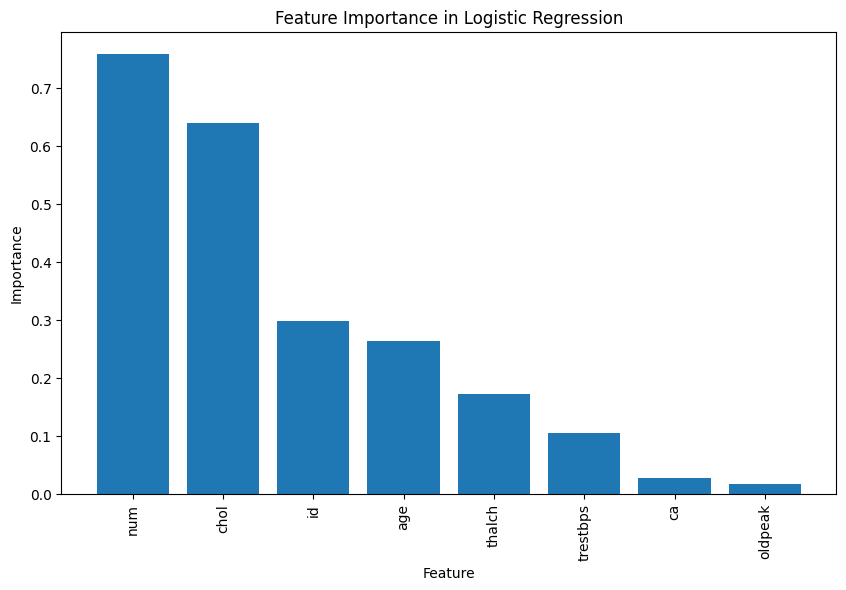

In [101]:
feature_importance = abs(model.coef_[0])
feature_names = X.columns
sorted_indices = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importance)), feature_importance[sorted_indices], align='center')
plt.xticks(range(len(feature_importance)), feature_names[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importance in Logistic Regression")
plt.show()